### Treść zadania

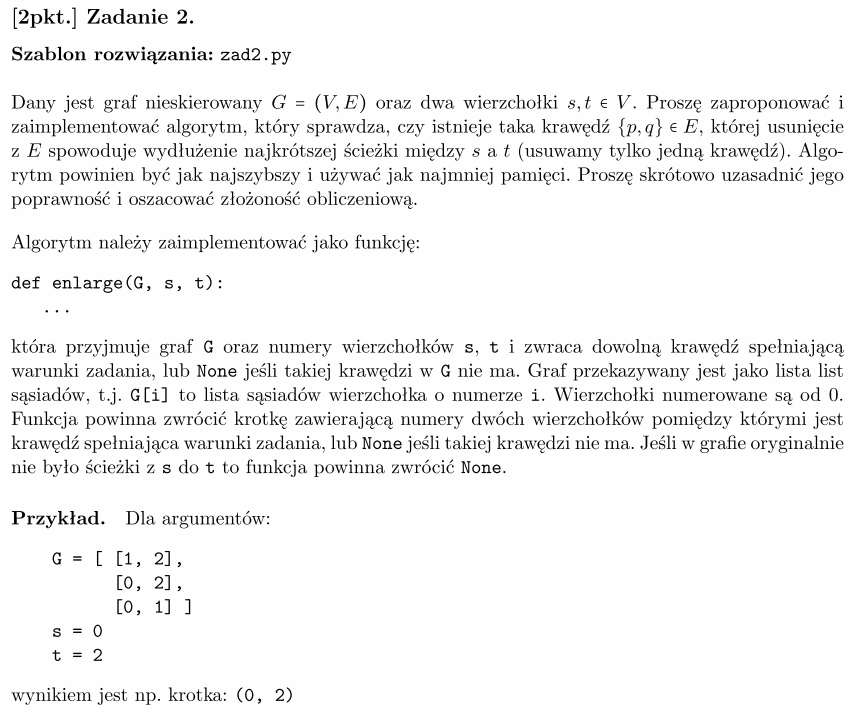

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
G1 = [[1, 2],
      [0, 2],
      [0, 1]]
s1 = 0
t1 = 2
r1 = (0, 2)

G2 = [[1, 4],  # 0
      [0, 2],  # 1
      [1, 3],  # 2
      [2, 5],  # 3
      [0, 5],  # 4
      [4, 3]]  # 5
s2 = 0
t2 = 3
r2 = None

s3 = 0
t3 = 2
r3 = [(0, 1), (1, 2)]

G4 = [[1, 4, 3],  # 0
      [0, 2],  # 1
      [1, 3],  # 2
      [2, 5, 0],  # 3
      [0, 5],  # 4
      [4, 3]]  # 5
s4 = 0
t4 = 2
r4 = None

TESTS = [(G1, s1, t1, r1),
         (G2, s2, t2, r2),
         (G2, s3, t3, r3),
         (G4, s4, t4, r4)
         ]


def runtests(f):
    OK = True
    for (G, s, t, r) in TESTS:
        print("----------------------")
        print("G: ", G)
        print("s: ", s)
        print("t: ", t)
        print("oczekiwany wynik: ", r)
        sol = f(G, s, t)
        print("uzyskany wynik  : ", sol)
        if not ((sol == r) or (sol in r)):
            print("PROBLEM!!!!!!")
            OK = False

    print("----------------------")
    if not OK:
        print("PROBLEMY!")
    else:
        print("OK")

# Sposób #1 (wysłany przeze mnie)

### Omówienie algorytmu

Wywołuję BFS, aby znaleźć rodziców elementów, które leżą na najkrótszych ścieżkach.
Następnie, na uzyskanym grafie rodziców, wywołuję ponownie BFS, śledząc, iloma ścieżkami
się poruszam w danym momencie. Jeżeli jest tylko jedna taka ścieżka, usunięcie krawędzi
musi spowodować przedłużenie najkrótszej ścieżki, ponieważ jest to jedyna krawędź
na najkrótszej ścieżce. Wtedy przerywam BFS i zwracam krawędź. Jeżeli natomiast nie
zdarzy się taka sytuacja, oznacza to, że usunięcie dowolnej krawędzi jest możliwe.

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V + E) $

### Implementacja

In [2]:
from queue import Queue


def enlarge(G, s, t):
    n = len(G)
    parents = [[] for _ in range(n)]
    dist = [-1] * n
    q = Queue()
    q.put(t)
    dist[t] = 0

    while not q.empty():
        u = q.get()
        if u == s: break
        for v in G[u]:
            if dist[v] < 0:
                dist[v] = dist[u] + 1
                parents[v].append(u)
                q.put(v)
            elif dist[v] == dist[u] + 1:
                parents[v].append(u)

    # Go back using BFS and parents graph
    # if we enter a vertex only in one iteration
    # (there is one shortest path to the vertex)
    # removing an edge which we entered will make
    # the shortest path longer
    return find_edge(parents, s, t)


def find_edge(G, s, t):
    n = len(G)
    visited = [False] * n
    parents = [-1] * n
    q = Queue()
    visited[s] = True

    for v in G[s]:
        parents[v] = s
        visited[v] = True
        q.put((v, 1))

    curr_i = 1
    count = 0
    while not q.empty():
        u, i = q.get()

        if i == curr_i:
            count += 1
        else:
            if count == 1:
                return parents[u], u
            curr_i = i
            count = 1

        for v in G[u]:
            # Visit only unvisited vertex or a target vertex (target can
            # be visited from different paths if there is more than one
            # shortest path from the start vertex to the target)
            if not visited[v] or v == t:
                visited[v] = True
                parents[v] = u
                q.put((v, i + 1))

    if count == 1:
        return parents[t], t

    return None

###### Kilka testów

In [3]:
runtests(enlarge)

----------------------
G:  [[1, 2], [0, 2], [0, 1]]
s:  0
t:  2
oczekiwany wynik:  (0, 2)
uzyskany wynik  :  (0, 2)
----------------------
G:  [[1, 4], [0, 2], [1, 3], [2, 5], [0, 5], [4, 3]]
s:  0
t:  3
oczekiwany wynik:  None
uzyskany wynik  :  None
----------------------
G:  [[1, 4], [0, 2], [1, 3], [2, 5], [0, 5], [4, 3]]
s:  0
t:  2
oczekiwany wynik:  [(0, 1), (1, 2)]
uzyskany wynik  :  (1, 2)
----------------------
G:  [[1, 4, 3], [0, 2], [1, 3], [2, 5, 0], [0, 5], [4, 3]]
s:  0
t:  2
oczekiwany wynik:  None
uzyskany wynik  :  None
----------------------
OK


# Sposób #2 (przedstawiony jako wzorcowy)

### Omówienie algorytmu

<div>
    <video src="./video/REC_20210624163226151.mp4" controls style="width: 100%; height: 100%; padding: 0; margin: 0 auto;"></video>
</div>

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $ - traktuję graf otrzymany na wejściu jako dany i nie wliczam go do złożoności

### Implementacja

In [4]:
from queue import Queue


def get_shortest_paths_vertices(G, s, t):
    n = len(G)
    inf = float('inf')
    dist1 = [inf] * n
    dist2 = [inf] * n
    calc_distances(G, s, t, dist1)
    calc_distances(G, t, s, dist2)
    min_dist = dist1[t]
    valid = [False] * n
    
    for i in range(n):
        if dist1[i] + dist2[i] == min_dist:
            valid[i] = True
            
    return valid, dist1


def calc_distances(G, s, t, dist):
    dist[s] = 0
    inf = float('inf')
    q = Queue()
    q.put(s)
    
    while not q.empty():
        u = q.get()
        for v in G[u]:
            if dist[v] == inf:
                dist[v] = dist[u] + 1
                q.put(v)
        

def enlarge(G, s, t):
    n = len(G)
    valid, dist = get_shortest_paths_vertices(G, s, t)
    max_dist = dist[t]
    vert = [[] for _ in range(max_dist + 1)]
    # Store vertices which are 'i' edges far from
    # the s vertex where 'i' is an index of counts array
    for u in range(n):
        if valid[u]:
            vert[dist[u]].append(u)
    # look for an edge adjacent to both vertices which are only
    # one vertices at a specific distance from the 's' vertex
    for i in range(max_dist):
        if len(vert[i]) == len(vert[i + 1]) == 1:
            return vert[i][0], vert[i + 1][0]
    return None

###### Kilka testów

In [5]:
runtests(enlarge)

----------------------
G:  [[1, 2], [0, 2], [0, 1]]
s:  0
t:  2
oczekiwany wynik:  (0, 2)
uzyskany wynik  :  (0, 2)
----------------------
G:  [[1, 4], [0, 2], [1, 3], [2, 5], [0, 5], [4, 3]]
s:  0
t:  3
oczekiwany wynik:  None
uzyskany wynik  :  None
----------------------
G:  [[1, 4], [0, 2], [1, 3], [2, 5], [0, 5], [4, 3]]
s:  0
t:  2
oczekiwany wynik:  [(0, 1), (1, 2)]
uzyskany wynik  :  (0, 1)
----------------------
G:  [[1, 4, 3], [0, 2], [1, 3], [2, 5, 0], [0, 5], [4, 3]]
s:  0
t:  2
oczekiwany wynik:  None
uzyskany wynik  :  None
----------------------
OK


# Sposób #3 (z wyszukiwaniem mostów)

### Omówienie algorytmu

Algorytm podobny do tego ze sposobu #2, ale nieco głupszy pomysł, ponieważ dorabiamy sobie roboty z szukaniem mostów. Nie zmienia to faktu, iż złożoność wciąż jest taka sama i wynosi $ O(V + E) $. Ponownie wyznaczamy długości najkrótszych ścieżek z wierzchołka startowego $ s $ do wszystkich innych wierzchołków oraz z wierzchołka $ t $ do wszystkich innych wierzchołków (zapisujemy je w osobnych tablicach) i na ich podstawie sprawdzamy, które wierzchołki leżą na najkrótszych ścieżkach (tablica $ valid $). Pozostałe wierzchołki traktujemy jak usunięte z grafu, ale ich fizycznie nie usuwamy, bo jest to bardzo niewydajne w listowej reprezentacji grafu (usuwanie krawędzi z tablic), a jedynie trzymamy tablicę boolowską $ valid $, w której wartość $ True $ oznacza, że wierzchołek znajduje się w grafie najkrótszych ścieżek między wierzchołkami $ s $ i $ t $. Następnie wsytarczy użcyć algorytmu znajdowania mostów zmodyfikowanego w taki sposób, że uzględnia on tylko wierzchołki, które w tablicy $ valid $ mają wartość $ True $ i zwraca pierwszy znaleziony most (interesuje nas tylko jedna krawędź).

### Złożoność

###### Obliczeniowa:
$ O(V + E) $
###### Pamięciowa:
$ O(V) $ - traktuję graf otrzymany na wejściu jako dany i nie wliczam go do złożoności

### Implementacja

In [6]:
from queue import Queue


def find_bridge(G: 'graph represented by adjacency lists', valid):
    n = len(G)
    low = [0] * n
    times = [0] * n
    time = 0
    
    def dfs(u, parent):
        nonlocal time
        time += 1
        low[u] = times[u] = time
        
        for v in G[u]:
            if not valid[v]: continue
            # when there is no visit time, a vertex hasn't been yet visited
            if not times[v]:
                res = dfs(v, u)
                if res: return res
                # If we have a cycle, we must update the low value of the parent vertex
                if low[v] < low[u]: low[u] = low[v]
            # v cannot be a parent of u as it's obvious it will always be visited before
            # and connected to the vertex u which doesn't imply that we have a back edge
            elif v != parent:  
                # We have a back edge (we try to enter a vertex which was entered before)
                if times[v] < low[u]: low[u] = times[v]
                    
        # We will start from parent -1 as the first vertex has no parent
        if times[u] == low[u] and parent >= 0:
            return (parent, u)
        return None

    # Check all possible starting vertices as a graph doesn't have to be consistent
    for i in range(n):
        if not times[i] and valid[i]:
            res = dfs(i, -1)
            if res:
                return res
    return None


def get_shortest_paths_vertices(G, s, t):
    n = len(G)
    inf = float('inf')
    dist1 = [inf] * n
    dist2 = [inf] * n
    calc_distances(G, s, t, dist1)
    calc_distances(G, t, s, dist2)
    min_dist = dist1[t]
    valid = [False] * n
    
    for i in range(n):
        if dist1[i] + dist2[i] == min_dist:
            valid[i] = True
            
    return valid


def calc_distances(G, s, t, dist):
    dist[s] = 0
    inf = float('inf')
    q = Queue()
    q.put(s)
    
    while not q.empty():
        u = q.get()
        for v in G[u]:
            if dist[v] == inf:
                dist[v] = dist[u] + 1
                q.put(v)
        

def enlarge(G, s, t):
    valid = get_shortest_paths_vertices(G, s, t)
    return find_bridge(G, valid)

###### Kilka testów

In [7]:
runtests(enlarge)

----------------------
G:  [[1, 2], [0, 2], [0, 1]]
s:  0
t:  2
oczekiwany wynik:  (0, 2)
uzyskany wynik  :  (0, 2)
----------------------
G:  [[1, 4], [0, 2], [1, 3], [2, 5], [0, 5], [4, 3]]
s:  0
t:  3
oczekiwany wynik:  None
uzyskany wynik  :  None
----------------------
G:  [[1, 4], [0, 2], [1, 3], [2, 5], [0, 5], [4, 3]]
s:  0
t:  2
oczekiwany wynik:  [(0, 1), (1, 2)]
uzyskany wynik  :  (1, 2)
----------------------
G:  [[1, 4, 3], [0, 2], [1, 3], [2, 5, 0], [0, 5], [4, 3]]
s:  0
t:  2
oczekiwany wynik:  None
uzyskany wynik  :  None
----------------------
OK
